<a href="https://colab.research.google.com/github/SantiagoPedrol/EDA_Basketball/blob/main/EDA_BASKETBALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

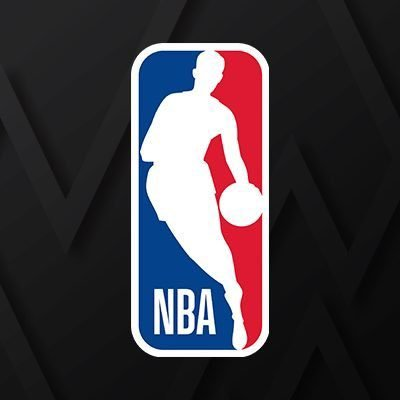

# Objetivos y Dataset

El dataset contiene aproximadamente unos 55 mil datos, en el cual cada fila se representa a un jugador de Basketball y las columnas estan compuestas por estadisticas del juego tales como las siguientes:


*  League = Nombre de la liga
*  Season = Año de la temporada YYYY-YYYY
*  Stage = Internacional, NBA:Playoffs,Temporada regular
*  Player = Nombre completo del jugador
*  Team = Nombre del equipo
*  GP = Partidos jugados
*  MIN = Minutos jugados
*  FGM = Tiros dobles anotados
*  FGA = Tiros de doble intentados
*  3PM = Tiros triples anotados
*  3PA = Tiros triples intentados
*  FTM = Tiros libres anotados
*  FTA = Tiros libres intentados
*  TOV = Cambio de posesión
*  PF = Faltas personales
*  ORB = Rebotes Offensivos
*  DRB = Rebotes Defensivos
*  REB = Rebotes
*  AST = Asistencia
*  STL = Robos
*  BLK = Bloqueos
*  PTS = Puntos
*  birth_year = Año de nacimiento
*  birth_month = Mes de nacimiento
*  birth_date = Fecha de nacimiento
*  height = Estatura en pies
*  height_cm = Estatura en CM
*  weight = Peso
*  weight_kg = Peso en KG
*  nationality = Nacionalidad
*  high_school = Escuela Secundaria



# **En este analisis solo se utilizara los datos de la liga NBA durante los años 2002-03**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data_set = pd.read_csv('players_stats_by_season_full_details.csv')

In [3]:
data_set.shape

(53949, 34)

In [4]:
data_set.rename(columns={"3PM":"TPM", "3PA": "TPA"}, inplace=True)

data_set.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,TPM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [5]:
data_set['gameper_ast']=data_set['AST']/data_set['GP']

data_set.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,TPM,...,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,gameper_ast
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic,3.784810
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors,3.926829
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz,3.707317
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers,4.685714
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics,8.926829


In [6]:
NBA = data_set[data_set['League'] == 'NBA']
print(NBA.shape)
print(NBA.columns)

(7633, 35)
Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', 'TPM', 'TPA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team',
       'gameper_ast'],
      dtype='object')


In [7]:
NBA.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,TPM,...,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,gameper_ast
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic,3.784810
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors,3.926829
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz,3.707317
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers,4.685714
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics,8.926829


In [34]:
print(pd.isnull(NBA).sum())

League           0
Season           0
Stage            0
Player           0
Team             0
GP               0
MIN              0
FGM              0
FGA              0
TPM              0
TPA              0
FTM              0
FTA              0
TOV              0
PF               0
ORB              0
DRB              0
REB              0
AST              0
STL              0
BLK              0
PTS              0
birth_year       0
birth_month      0
birth_date       0
height           0
height_cm        0
weight           0
weight_kg        0
nationality      0
high_school    847
draft_round    752
draft_pick     752
draft_team     752
gameper_ast      0
dtype: int64


In [9]:
NBA03 = NBA[NBA['Season'] == '2002 - 2003']
NBA03_S = NBA03[NBA03['Stage'] == 'Regular_Season']
NBA03_PO = NBA03[NBA03['Stage'] == 'Playoffs']

print(NBA03.shape)
print(NBA03_S.shape)
print(NBA03_PO.shape)

(364, 35)
(217, 35)
(147, 35)


# **Inicio de Analisis**
Comenzaremos el proyecto por la visualización de las nacionalidades en la liga NBA

In [10]:
NBA.groupby('nationality').count().reset_index().iloc[:,:2].sort_values('League', ascending=False).head(10)

,nationality,League
74,United States,6076
26,France,132
11,Canada,95
65,Spain,79
1,Argentina,63
63,Slovenia,61
9,Brazil,60
61,Serbia,58
72,Turkey,57
3,Australia,54


Como es evidente que hay una mayoría de jugadores Estadounidenses, aparatamos a USA y graficamos las nacionalidades por jugador en la NBA

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


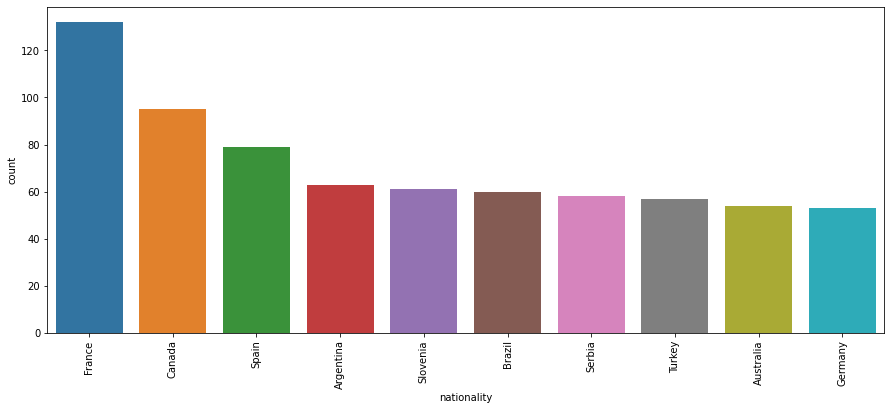

In [11]:
# Sin USA
plt.figure(figsize=(15, 6))
sns.countplot(NBA[NBA['nationality'] != 'United States'].nationality, order = NBA[NBA['nationality'] != 'United States']['nationality'].value_counts().iloc[:10].index)
l=plt.xticks(rotation=90)

Ahora observamos las nacionalidades por jugador en la temporada y playoffs del año 2002-03

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


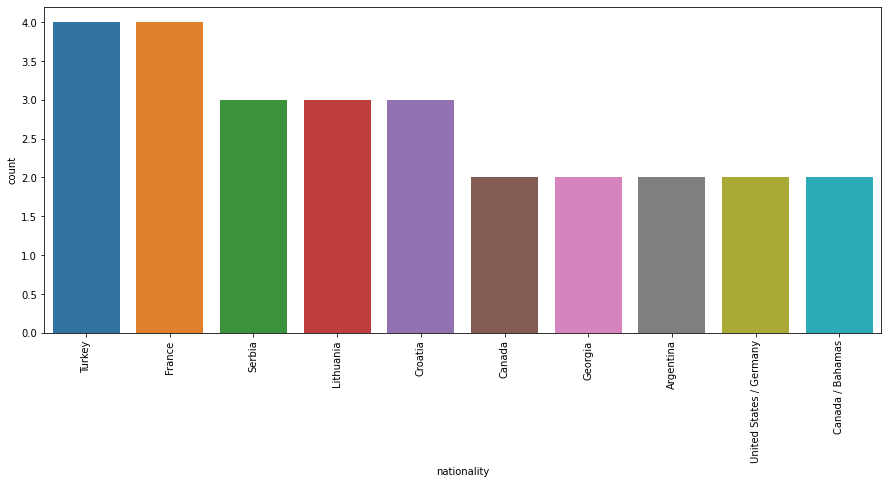

In [12]:
# Sin USA
plt.figure(figsize=(15, 6))
sns.countplot(NBA[(NBA['nationality'] != 'United States') & (NBA['Season'] == '2002 - 2003')].nationality, order = NBA[(NBA['nationality'] != 'United States') & (NBA['Season'] == '2002 - 2003')]['nationality'].value_counts().iloc[:10].index)
l=plt.xticks(rotation=90)

A continuación veremos que jugadores fueron los que mayor partidos jugaron en la temporada 2002-03. Y luego los jugadores que menor cantidad de presencias tuvieron.

In [13]:
# Mayor cantidades de PJ en 2002-03
maxgameS = NBA03_S.sort_values('GP',ascending=True)

maxgameS = maxgameS[207:216]

fig = go.Figure(go.Funnel(
    y =  list(maxgameS['Player']),
    x = list(maxgameS['GP']))) 
fig.update_layout(title = "Top 10 Jugadores con GP en la temporada 2002-03",title_x=0.5)
fig.show()

In [14]:
# Menor cantidades de PJ en 2002-03
mingameS=NBA03_S.sort_values('GP',ascending=True)

mingameS=mingameS[0:10]

fig = go.Figure(go.Funnel(
    y =  list(mingameS['Player']),
    x = list(mingameS['GP']))) 
fig.update_layout(title = "Jugadores con menor cantidad de GP en la temporada 2002-03",title_x=0.5)
fig.show()

Haremos lo mismo que antes solo que con los Playoffs de 2002-03

In [15]:
# Mayores cantidades de PJ en 2002-03 Playoffs
mingame=NBA03_PO.sort_values('GP',ascending=False)

mingame=mingame[0:10]

fig = go.Figure(go.Funnel(
    y =  list(mingame['Player']),
    x = list(mingame['GP']))) 
fig.update_layout(title = "Jugadores con menor cantidad de GP en los Playoffs 2002-03",title_x=0.5)
fig.show()

In [16]:
# Menor cantidades de GP en 2002-03 Playoffs
maxgame=NBA03_PO.sort_values('GP',ascending=False)

maxgame=maxgame[137:147]

fig = go.Figure(go.Funnel(
    y =  list(maxgame['Player']),
    x = list(maxgame['GP']))) 
fig.update_layout(title = "Top 10 Jugadores con GP en los Playoffs de 2002-03",title_x=0.5)
fig.show()

Continuamos por observar mediante un grafico de barras horizontal los mayores anotadores de la Temporada Regular 2002-03

In [17]:
maxscore03=NBA03_S.sort_values('PTS',ascending=True)

maxscore03=maxscore03[-10:]

fig = go.Figure(go.Bar(
    y=maxscore03['Player'],x=maxscore03['PTS'],orientation="h",
    marker={'color': maxscore03['PTS'], 
    'colorscale': 'fall'},  
    text=maxscore03['PTS'],
    textposition = "outside",
))
fig.update_layout(title = "Top 10 Players Season Total Points",title_x=0.5)
fig.show()

#Observamos que el jugador Kobe Bryant es el jugador con la mayor cantidad de puntos anotados en toda la temporada y post-temoporada 2002-03

Observamos que el jugador Kobe Bryant es el jugador con la mayor cantidad de puntos anotados en toda la temporada y post-temoporada 2002-03

Analizaremos al mayor anotador de la temporada, destacando información como la cantidad de partidos jugados, la cantidad de puntos, la cantidad de asisitencias realizadas, rebotes logrados y bloqueos logrados.

In [32]:
kobe = NBA03_S[NBA03_S['Player']=='Kobe Bryant']

sum_pts=kobe.PTS.sum()

sum_ast=kobe.AST.sum()

sum_reb=kobe.REB.sum()

sum_blk=kobe.BLK.sum()

sum_game=kobe.GP.sum()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  sum_game,
    domain = {'x': [0.25, 1], 'y': [0.1, 0.2]},
    title = {'text': "Partidos Jugados en la temporada regular",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 2500]},
        'bar': {'color': "blue"}}))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_pts,
    domain = {'x': [0.25, 1], 'y': [0.3, 0.4]},
    title = {'text': "Puntos convertidos en la temporada regular",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_ast,
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text' :"Asistencias realizadas en la temporada regular",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "darkblue"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_reb,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text' :"Rebotes ganados en la temporada regular",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "darkcyan"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_blk,
    domain = {'x': [0.25, 1], 'y': [0.9,1]},
    title = {'text' :"Bloqueos realizados en la temporada regular",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" Kobe Bryant Regular Season  ",title_x=0.5)
fig.show()

Analizaremos los Puntos realizados por el mayor anotador de la temporada, Kobe Bryant.
Es decir, veremos la comparación de los 3 distintos tipos de tiro (FG, FT, 3P) entre los intentados y los anotados. 

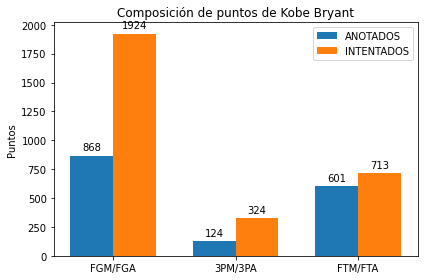

In [35]:
sum_fgm_kobe = kobe.FGM.sum()

sum_fga_kobe = kobe.FGA.sum()

sum_3pm_kobe = kobe.TPM.sum()

sum_3pa_kobe = kobe.TPA.sum()

sum_ftm_kobe = kobe.FTM.sum()

sum_fta_kobe = kobe.FTA.sum()

eje_x = ['FGM/FGA', '3PM/3PA', 'FTM/FTA']

made = [sum_fgm_kobe, sum_3pm_kobe, sum_ftm_kobe]

attempts = [sum_fga_kobe, sum_3pa_kobe, sum_fta_kobe]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(eje_x))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, made, width, label='ANOTADOS')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, attempts, width, label='INTENTADOS')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Puntos')
ax.set_title('Composición de puntos de Kobe Bryant')
ax.set_xticks(x)
ax.set_xticklabels(eje_x)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()

A continuación, haremos el mismo analisis pero enfocandonos en los playoffs.
Analizaremos lo mismo pero en la instancia de post-temporada. 

In [20]:
### TOP SCORES PLAYOFFS ###

maxscore03PO=NBA03_PO.sort_values('PTS',ascending=True)

maxscore03PO=maxscore03PO[-10:]

fig = go.Figure(go.Bar(
    y=maxscore03PO['Player'],x=maxscore03PO['PTS'],orientation="h",
    marker={'color': maxscore03PO['PTS'], 
    'colorscale': 'fall'},  
    text=maxscore03PO['PTS'],
    textposition = "outside",
))
fig.update_layout(title = "Top 10 Players Season Total Points",title_x=0.5)
fig.show()

Al ser Tim Duncan el jugador con la mayor cantidad de punto anotados en los Playoffs, analisaremos sus estadisticas de la misma manera que lo hicimos con Kobe Bryant.

In [36]:
tim = NBA03_PO[NBA03_PO['Player']=='Tim Duncan']

sum_pts_tim=tim.PTS.sum()

sum_ast_tim=tim.AST.sum()

sum_reb_tim=tim.REB.sum()

sum_blk_tim=tim.BLK.sum()

sum_game_tim=tim.GP.sum()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  sum_game_tim,
    domain = {'x': [0.25, 1], 'y': [0.1, 0.2]},
    title = {'text': "Partidos Jugados en los Playoffs",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 750]},
        'bar': {'color': "blue"}}))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_pts_tim,
    domain = {'x': [0.25, 1], 'y': [0.3, 0.4]},
    title = {'text': "Puntos anotados en los Playoffs",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,750]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_ast_tim,
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text' :"Asistencias realizadas en los Playoffs",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,750]},
        'bar': {'color': "darkblue"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_reb_tim,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text' :"Rebotes ganados en los Playoffs",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,750]},
        'bar': {'color': "darkcyan"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_blk_tim,
    domain = {'x': [0.25, 1], 'y': [0.9,1]},
    title = {'text' :"Bloqueos realizados en los Playoffs",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,750]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" Tim duncan Playoffs  ",title_x=0.5)
fig.show()

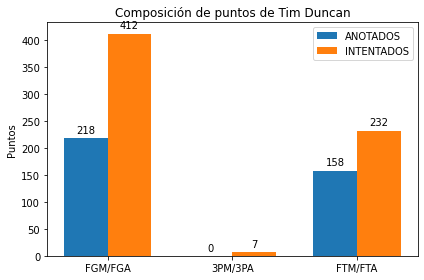

In [37]:
sum_fgm_tim = tim.FGM.sum()

sum_fga_tim = tim.FGA.sum()

sum_3pm_tim = tim.TPM.sum()

sum_3pa_tim = tim.TPA.sum()

sum_ftm_tim = tim.FTM.sum()

sum_fta_tim = tim.FTA.sum()

eje_x = ['FGM/FGA', '3PM/3PA', 'FTM/FTA']

made = [sum_fgm_tim, sum_3pm_tim, sum_ftm_tim]

attempts = [sum_fga_tim, sum_3pa_tim, sum_fta_tim]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(eje_x))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, made, width, label='ANOTADOS')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, attempts, width, label='INTENTADOS')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Puntos')
ax.set_title('Composición de puntos de Tim Duncan')
ax.set_xticks(x)
ax.set_xticklabels(eje_x)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()

A continuación veremos los mayores asistidores de la liga del año 2002-03.

In [23]:
maxast03S=NBA03_S.sort_values('AST',ascending=True)

maxast03S=maxast03S[-10:]

fig = go.Figure(go.Bar(
    y=maxast03S['Player'],x=maxast03S['AST'],orientation="h",
    marker={'color': maxast03S['AST'], 
    'colorscale': 'fall'},  
    text=maxast03S['AST'],
    textposition = "outside",
))
fig.update_layout(title = "Top 10 Players Season Total Assists",title_x=0.5)
fig.show()

In [24]:
maxast03PO=NBA03_PO.sort_values('AST',ascending=True)

maxast03PO=maxast03PO[-10:]

fig = go.Figure(go.Bar(
    y=maxast03PO['Player'],x=maxast03PO['AST'],orientation="h",
    marker={'color': maxast03PO['AST'], 
    'colorscale': 'fall'},  
    text=maxast03PO['AST'],
    textposition = "outside",
))
fig.update_layout(title = "Top 10 Players Season Total Assists",title_x=0.5)
fig.show()

Notamos que Jason Kidd es el mayor asisitidor tanto en la temporada regular como los Playoffs.
Haremos un promedio de sus asistencias por partido contemplando ambas instancias.

In [27]:
jas = NBA03[NBA03['Player']=='Jason Kidd']

sum_ast_jas = jas.gameper_ast.sum()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_ast_jas,
    domain = {'x': [0.25, 1], 'y': [0.9,1]},
    title = {'text' :"Promedio de AST",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,25]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" Jason Kidd  ",title_x=0.5)
fig.show()

Destacamos que Jason Kidd promedia 17 asistencias por partido.

Lo siguiente que haremos es un análisis en los Playoffs del equipo campeón de este año, los San Antonio Spurs.

In [28]:
print('The teams of NBA are :',NBA03.Team.unique())

The teams of NBA are : ['LAL' 'ORL' 'PHI' 'BOS' 'DAL' 'SAS' 'MIN' 'NYK' 'GSW' 'CHI' 'PHX' 'NOP'
 'SEA' 'HOU' 'UTA' 'WAS' 'MIL' 'CLE' 'DET' 'ATL' 'IND' 'MEM' 'SAC' 'NJN'
 'DEN' 'POR' 'MIA' 'TOR' 'LAC']


In [29]:
sas = NBA03_PO[NBA03_PO['Team']=='SAS'] 
sas.head(10)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,TPM,...,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,gameper_ast
1896,NBA,2002 - 2003,Playoffs,Tim Duncan,SAS,24,1021.0,218,412,0,...,6-11,211.0,250.0,113.0,United States,St. Dunstan's Episcopal High School,1.0,1.0,San Antonio Spurs,5.291667
1905,NBA,2002 - 2003,Playoffs,Tony Parker,SAS,24,814.0,135,335,15,...,6-2,188.0,185.0,84.0,France,NaN,1.0,28.0,San Antonio Spurs,3.541667
1908,NBA,2002 - 2003,Playoffs,Stephen Jackson,SAS,24,811.0,108,261,38,...,6-8,203.0,220.0,100.0,United States,Oak Hill Academy,2.0,14.0,Phoenix Suns,2.708333
1913,NBA,2002 - 2003,Playoffs,Manu Ginobili,SAS,24,660.0,71,184,28,...,6-6,198.0,205.0,93.0,Argentina,NaN,2.0,28.0,San Antonio Spurs,2.916667
1914,NBA,2002 - 2003,Playoffs,Malik Rose,SAS,24,560.0,75,179,0,...,6-7,201.0,250.0,113.0,United States,Overbrook High School,2.0,15.0,Charlotte Hornets,1.000000
1917,NBA,2002 - 2003,Playoffs,David Robinson,SAS,23,539.0,64,118,0,...,7-1,216.0,250.0,113.0,United States,Osbourn Park High School,1.0,1.0,San Antonio Spurs,0.913043
1920,NBA,2002 - 2003,Playoffs,Bruce Bowen,SAS,24,750.0,54,145,35,...,6-7,201.0,200.0,91.0,United States,Edison High School,NaN,NaN,NaN,1.625000
1941,NBA,2002 - 2003,Playoffs,Speedy Claxton,SAS,24,326.0,46,105,0,...,5-11,180.0,170.0,77.0,United States,Christ the King,1.0,20.0,Philadelphia Sixers,1.875000
1996,NBA,2002 - 2003,Playoffs,Kevin Willis,SAS,18,91.0,21,40,1,...,7-0,213.0,245.0,111.0,United States,Pershing High School,1.0,11.0,Atlanta Hawks,0.111111
2035,NBA,2002 - 2003,Playoffs,Danny Ferry,SAS,16,101.0,8,28,4,...,6-10,208.0,230.0,104.0,United States,DeMatha Catholic High School,1.0,2.0,Los Angeles Clippers,0.437500


In [31]:
sum_sas_pts = sas.PTS.sum()

sum_sas_ast = sas.AST.sum()

sum_sas_reb = sas.REB.sum()

sum_sas_orb = sas.ORB.sum()

sum_sas_drb = sas.DRB.sum()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  sum_sas_pts,
    domain = {'x': [0.25, 1], 'y': [0.1, 0.2]},
    title = {'text': "PTS",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 2500]},
        'bar': {'color': "blue"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_sas_ast,
    domain = {'x': [0.25, 1], 'y': [0.3, 0.4]},
    title = {'text': "AST",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "cyan"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_sas_reb,
    domain = {'x': [0.25, 1], 'y': [0.5,0.6]},
    title = {'text' :"REB",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "red"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_sas_orb,
    domain = {'x': [0.25, 1], 'y': [0.7,0.8]},
    title = {'text' :"ORB",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "red"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = sum_sas_drb,
    domain = {'x': [0.25, 1], 'y': [0.9,1]},
    title = {'text' :"DRB",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,2500]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" San Antonio Spurs  ",title_x=0.5)
fig.show()

# **¡Muchas gracias!**